In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime

In [2]:
df = pd.read_csv('./time_series_covid19_confirmed_US.csv')
df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,7150,7161,7172,7186,7186,7186,7206,7206,7209,7211
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,21661,21674,21684,21698,21698,21698,21724,21744,21755,21765
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,2337,2340,2343,2342,2342,2342,2343,2345,2346,2345
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,2665,2665,2665,2666,2666,2666,2667,2669,2670,2671
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,6887,6889,6894,6906,6906,6906,6916,6918,6921,6921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,3785,3785,3785,3787,3787,3787,3789,3792,3793,3793
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,2272,2279,2287,2289,2289,2289,2290,2292,2293,2296
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,924,925,924,924,924,924,925,924,925,924


In [3]:
date = df.columns[-1]
latest_count = df.loc[df.Province_State == 'California', ['Admin2', date]]
latest_count = latest_count.sort_values(by=date, ascending=False)
latest_count.head(10)

,Admin2,6/10/21
215,Los Angeles,1245786
230,Riverside,301284
233,San Bernardino,298843
234,San Diego,281051
226,Orange,272617
240,Santa Clara,119793
211,Kern,110546
231,Sacramento,107117
206,Fresno,102690
197,Alameda,89304


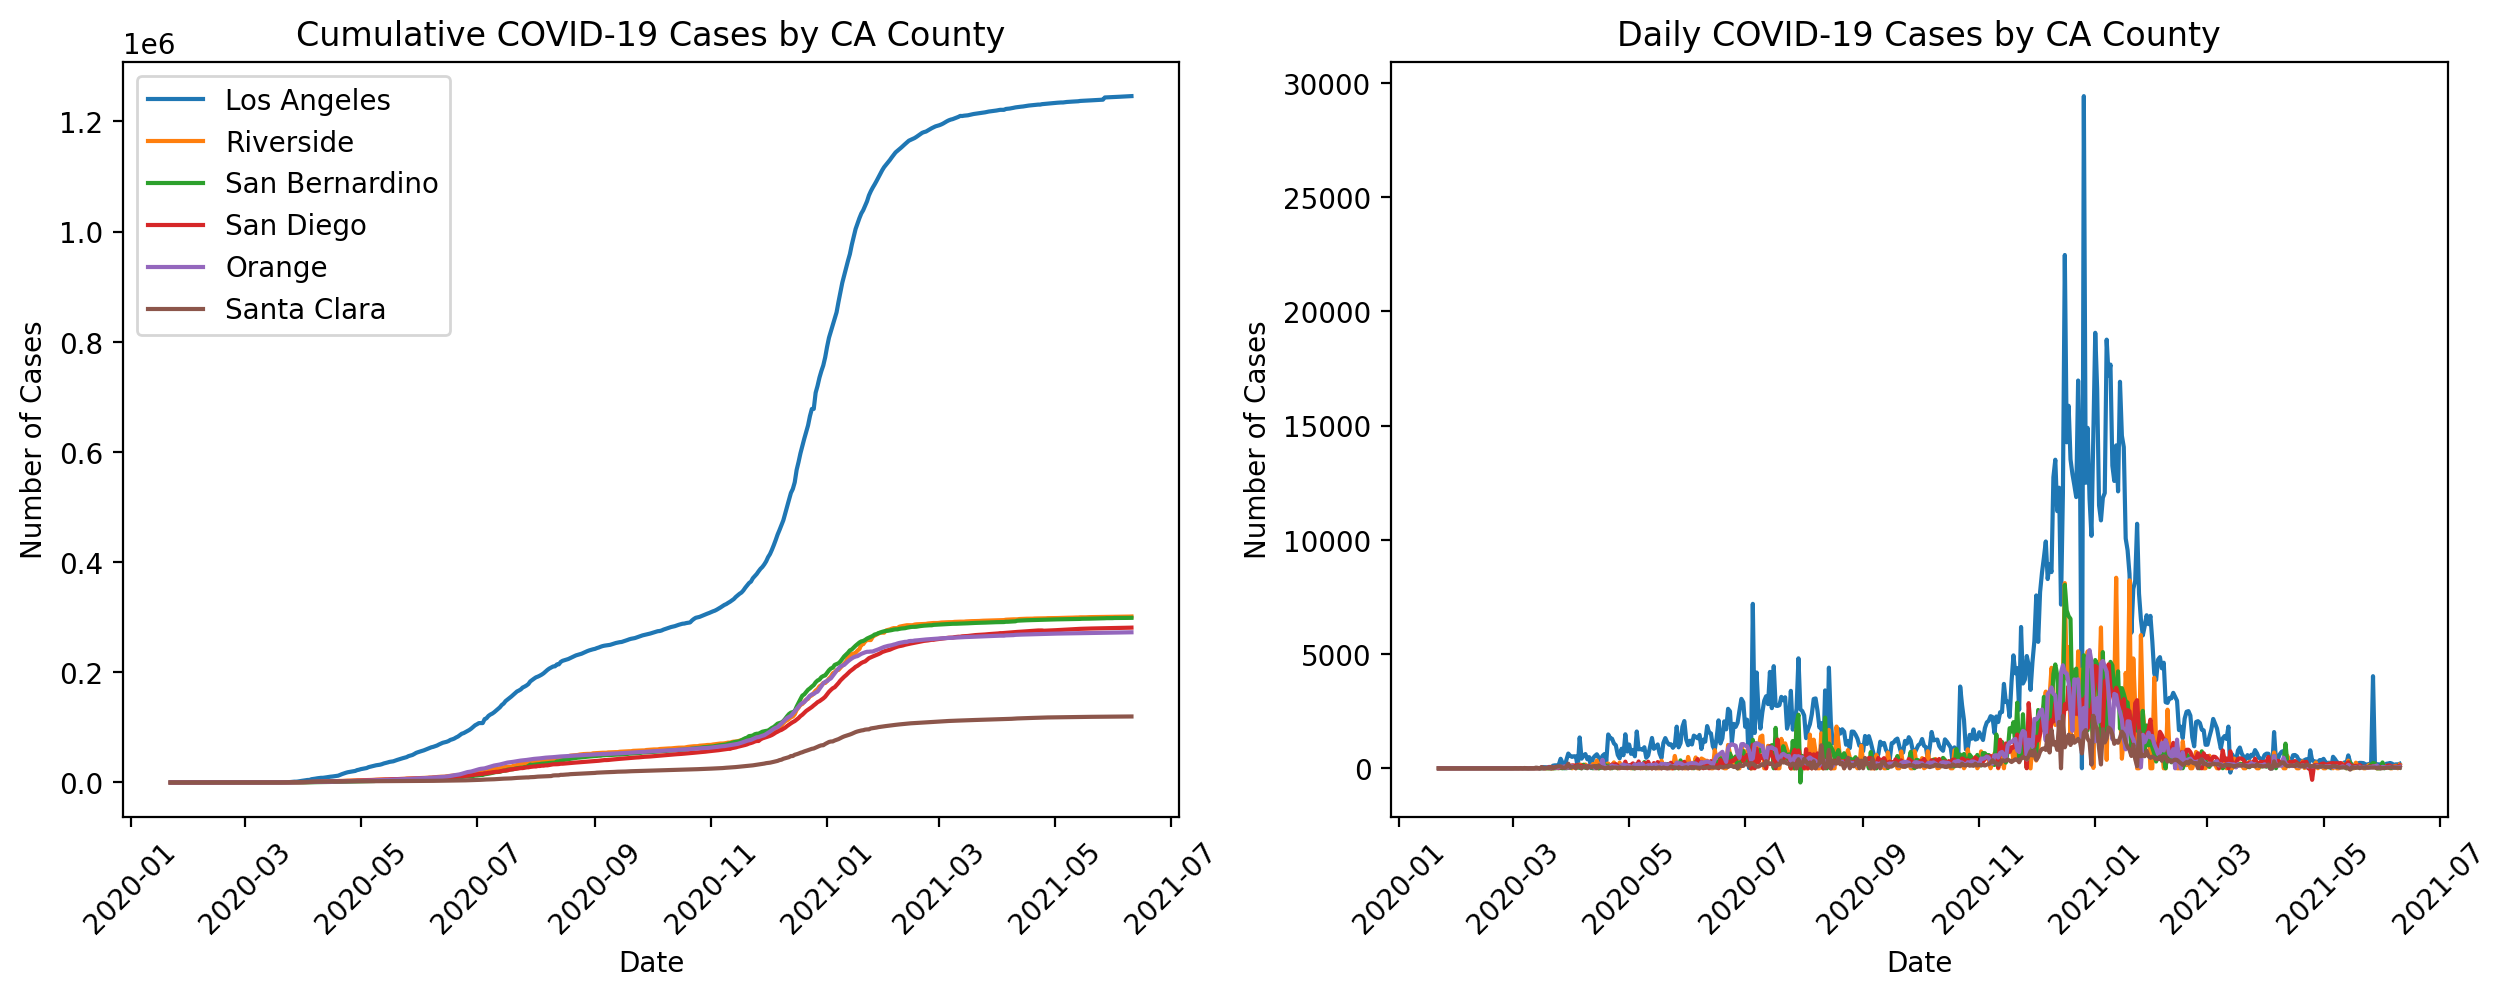

In [4]:
n = 6
county = latest_count.Admin2.values[:n]

index = 11
dates = [datetime.strptime(d, '%m/%d/%y') for d in df.columns[index:]]

fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=200)

for c in county:
    cases = df[df.Admin2 == c].values[0][index:]
    ax[0].plot(dates, cases)
    
    cases = [0] + [cases[i]-cases[i-1] for i in range(1, len(cases))]
    ax[1].plot(dates, cases)
    
ax[0].legend(county)

ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[0].set_ylabel('Number of Cases')
ax[1].set_ylabel('Number of Cases')

ax[0].set_title('Cumulative COVID-19 Cases by CA County')
ax[1].set_title('Daily COVID-19 Cases by CA County')

ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)

plt.savefig('covid_cases_ca_county', bbox_inches='tight', dpi=400)

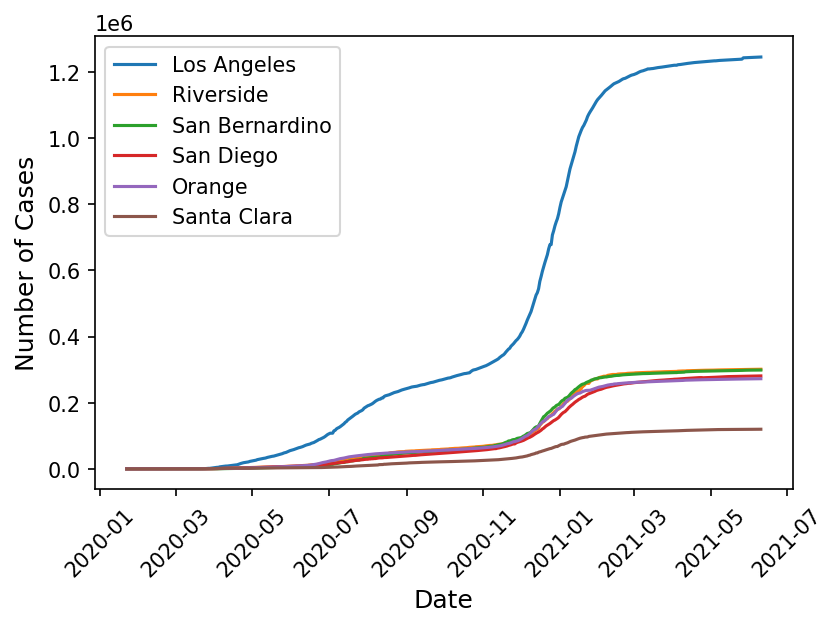

In [5]:
n = 6
county = latest_count.Admin2.values[:n]

index = 11
dates = [datetime.strptime(d, '%m/%d/%y') for d in df.columns[index:]]

plt.figure(dpi=150)

for c in county:
    cases = df[df.Admin2 == c].values[0][index:]
    plt.plot(dates, cases)
    
plt.legend(county)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)

plt.tick_params(axis='x', rotation=45)

plt.savefig('covid_cases_ca_county_cumulative', bbox_inches='tight', dpi=400)

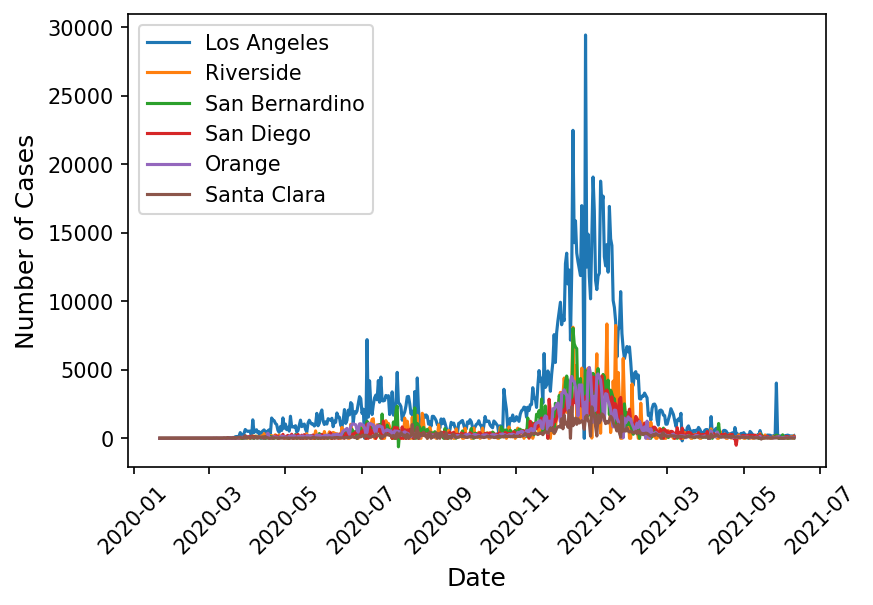

In [6]:
n = 6
county = latest_count.Admin2.values[:n]

index = 11
dates = [datetime.strptime(d, '%m/%d/%y') for d in df.columns[index:]]

plt.figure(dpi=150)

for c in county:
    cases = df[df.Admin2 == c].values[0][index:]
    cases = [0] + [cases[i]-cases[i-1] for i in range(1, len(cases))]
    plt.plot(dates, cases)
    
plt.legend(county)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)

plt.tick_params(axis='x', rotation=45)

plt.savefig('covid_cases_ca_county_daily', bbox_inches='tight', dpi=400)

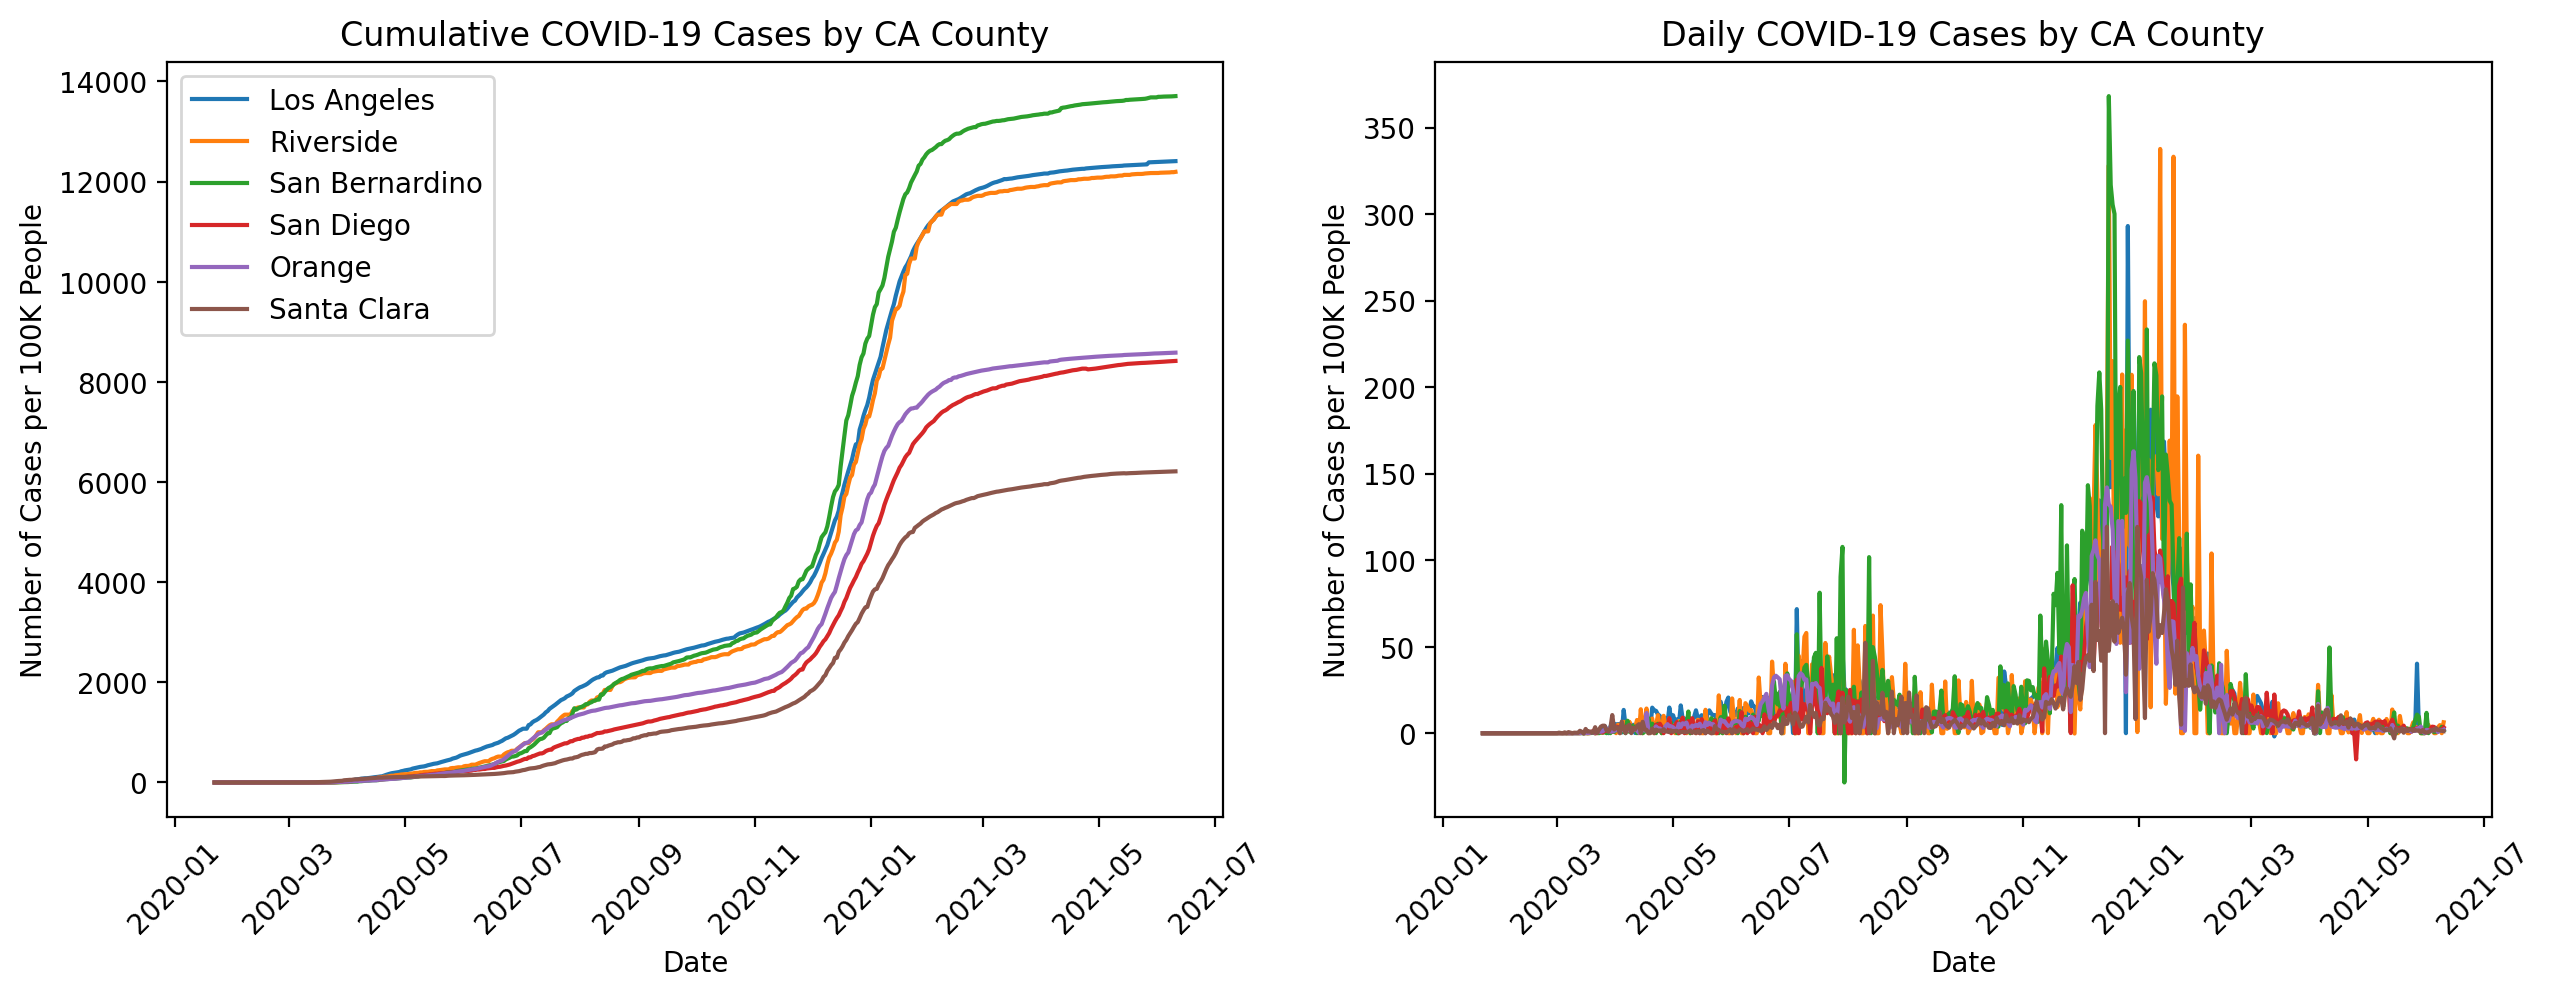

In [7]:
# county population (https://en.wikipedia.org/wiki/List_of_counties_in_California)
pop = {
    'Los Angeles': 10039107,
    'San Diego': 3338330,
    'Orange': 3175692,
    'Riverside': 2470546,
    'San Bernardino': 2180085,
    'Santa Clara': 1927852
}

n = 6
county = latest_count.Admin2.values[:n]

index = 11
dates = [datetime.strptime(d, '%m/%d/%y') for d in df.columns[index:]]

fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=200)

for c in county:
    cases = df[df.Admin2 == c].values[0][index:]
    ax[0].plot(dates, cases / pop[c] * 100000)
    
    cases = [0] + [(cases[i]-cases[i-1]) / pop[c] * 100000 for i in range(1, len(cases))]
    ax[1].plot(dates, cases)
    
ax[0].legend(county)

ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[0].set_ylabel('Number of Cases per 100K People')
ax[1].set_ylabel('Number of Cases per 100K People')

ax[0].set_title('Cumulative COVID-19 Cases by CA County')
ax[1].set_title('Daily COVID-19 Cases by CA County')

ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)

plt.savefig('covid_cases_ca_county_per_capita', bbox_inches='tight', dpi=400)

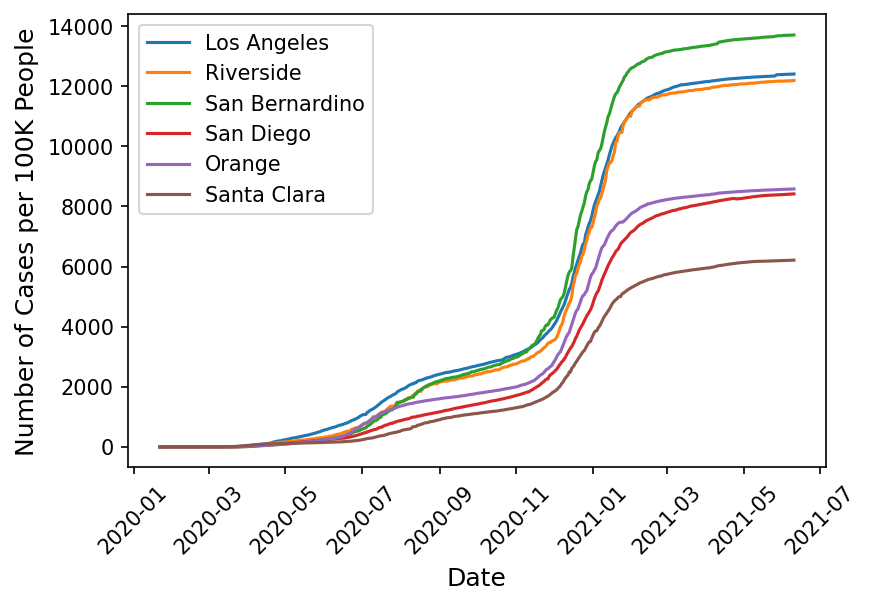

In [8]:
# county population (https://en.wikipedia.org/wiki/List_of_counties_in_California)
pop = {
    'Los Angeles': 10039107,
    'San Diego': 3338330,
    'Orange': 3175692,
    'Riverside': 2470546,
    'San Bernardino': 2180085,
    'Santa Clara': 1927852
}

n = 6
county = latest_count.Admin2.values[:n]

index = 11
dates = [datetime.strptime(d, '%m/%d/%y') for d in df.columns[index:]]

plt.figure(dpi=150)

for c in county:
    cases = df[df.Admin2 == c].values[0][index:]
    plt.plot(dates, cases / pop[c] * 100000)
    
plt.legend(county)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases per 100K People', fontsize=12)

plt.tick_params(axis='x', rotation=45)

plt.savefig('covid_cases_ca_county_cumulative_per_capita', bbox_inches='tight', dpi=400)

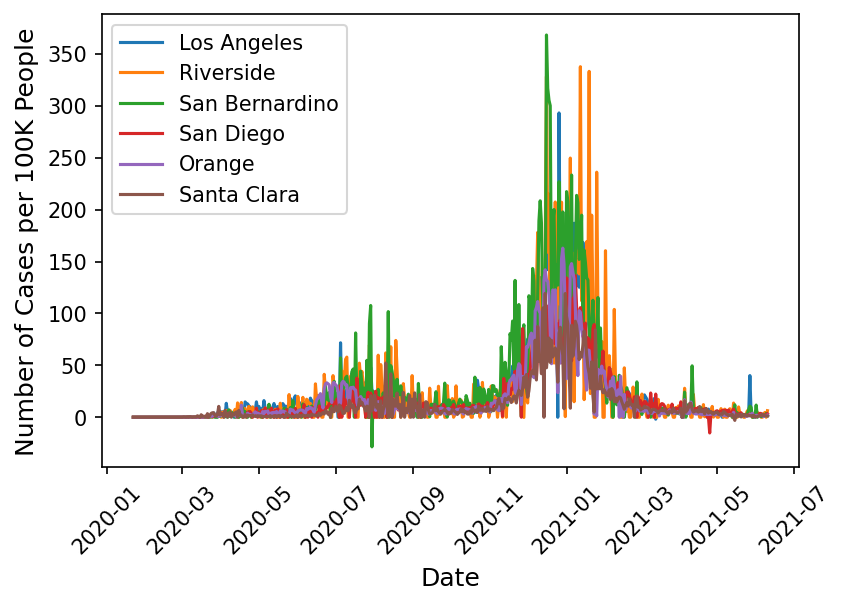

In [9]:
# county population (https://en.wikipedia.org/wiki/List_of_counties_in_California)
pop = {
    'Los Angeles': 10039107,
    'San Diego': 3338330,
    'Orange': 3175692,
    'Riverside': 2470546,
    'San Bernardino': 2180085,
    'Santa Clara': 1927852
}

n = 6
county = latest_count.Admin2.values[:n]

index = 11
dates = [datetime.strptime(d, '%m/%d/%y') for d in df.columns[index:]]

plt.figure(dpi=150)

for c in county:
    cases = df[df.Admin2 == c].values[0][index:]
    cases = [0] + [(cases[i]-cases[i-1]) / pop[c] * 100000 for i in range(1, len(cases))]
    plt.plot(dates, cases)
    
plt.legend(county)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases per 100K People', fontsize=12)

plt.tick_params(axis='x', rotation=45)

plt.savefig('covid_cases_ca_county_daily_per_capita', bbox_inches='tight', dpi=400)

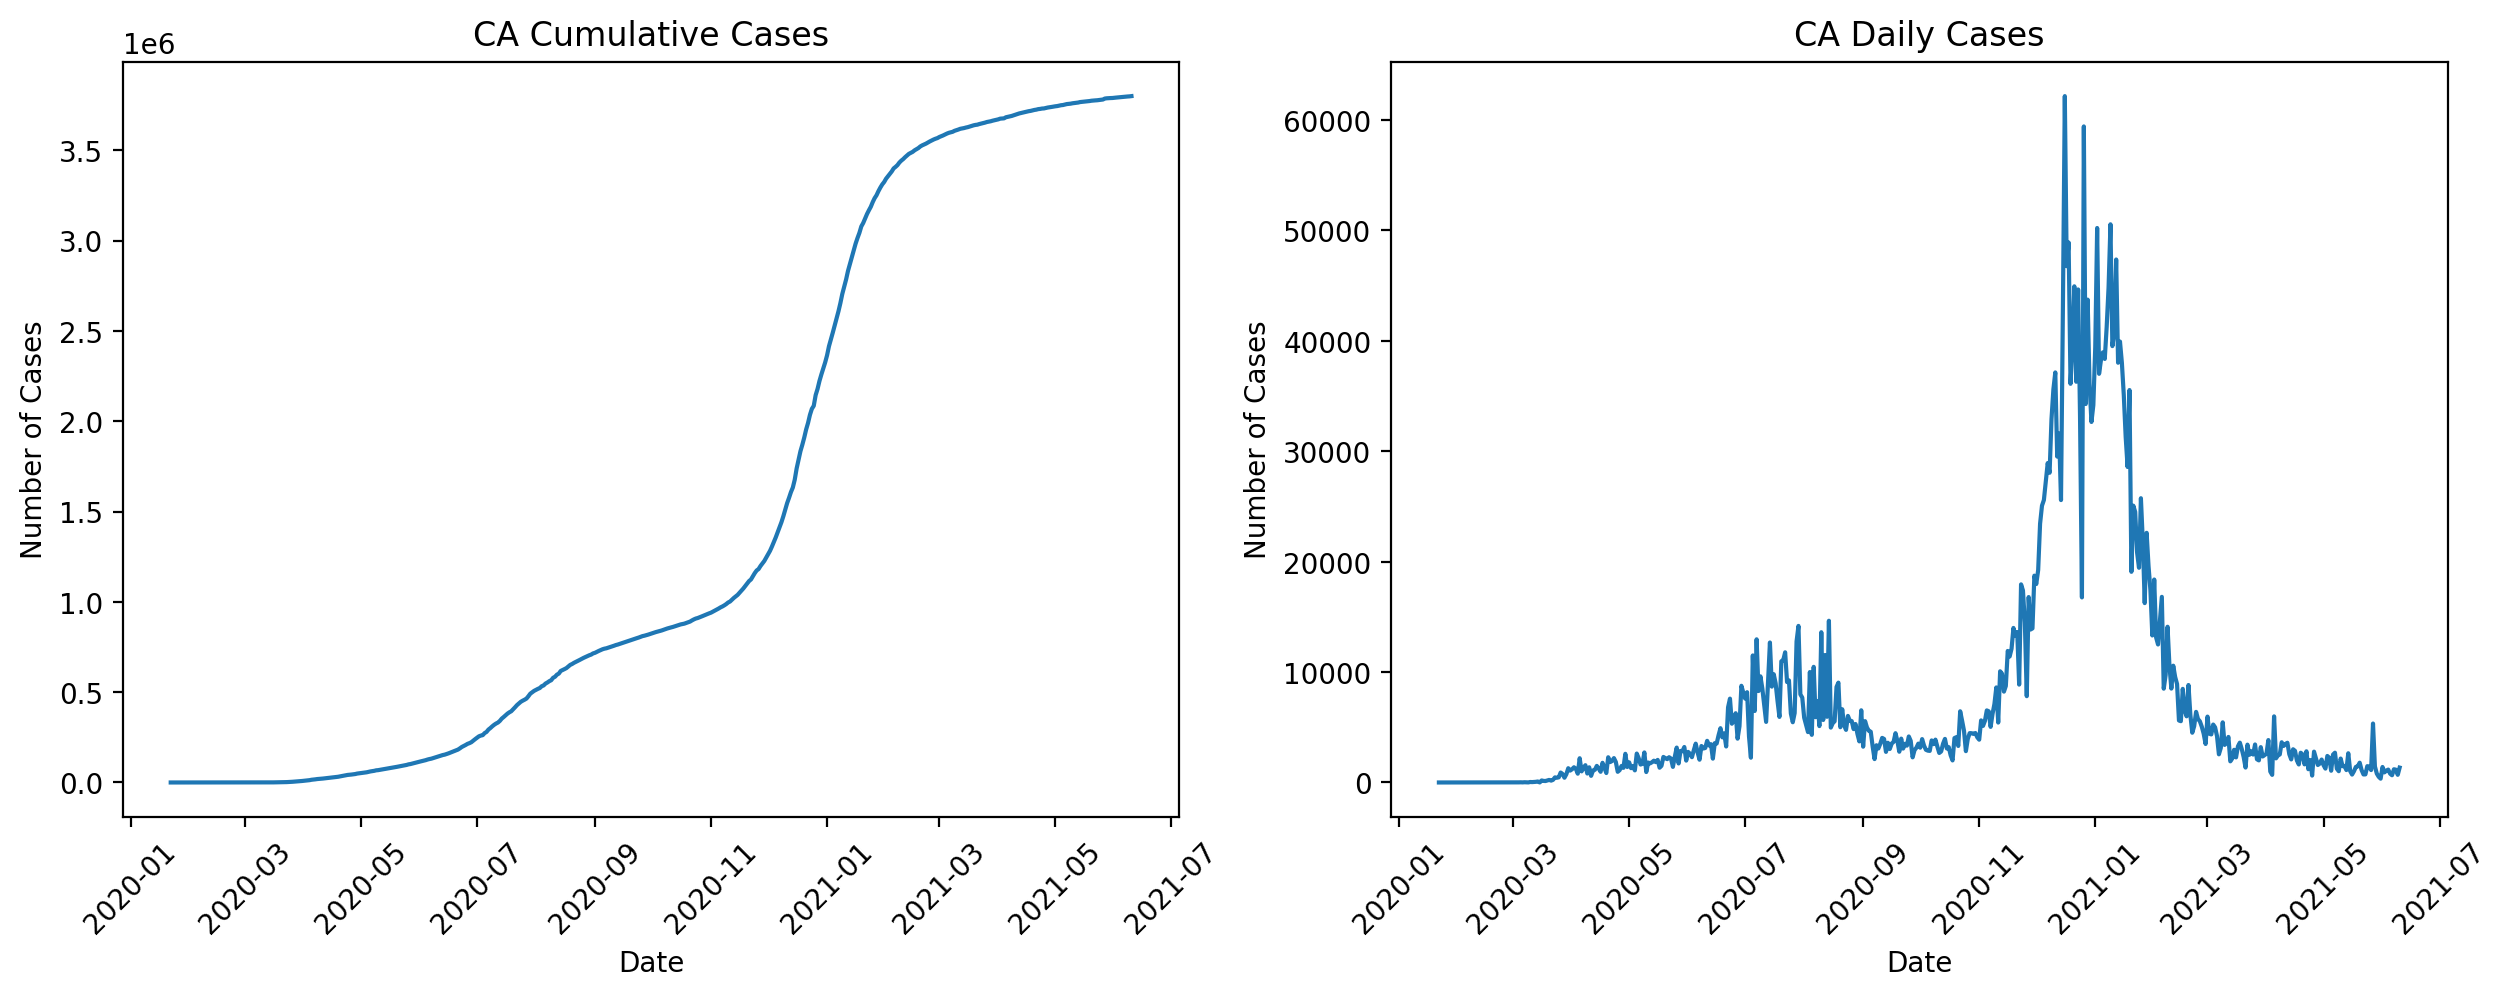

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=200)

cases = df.loc[df.Province_State == 'California', '1/22/20':].sum()
ax[0].plot(dates, cases)

cases = [0] + [cases[i]-cases[i-1] for i in range(1, len(cases))]
ax[1].plot(dates, cases)

ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[0].set_ylabel('Number of Cases')
ax[1].set_ylabel('Number of Cases')

ax[0].set_title('CA Cumulative Cases')
ax[1].set_title('CA Daily Cases')

ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)

plt.savefig('covid_cases_ca', bbox_inches='tight')